In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [75]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [76]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target)

In [77]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [78]:
from sklearn.linear_model import SGDClassifier

In [79]:
sc = SGDClassifier(loss='log', max_iter = 100)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100)

In [80]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8571428571428571
0.9


In [81]:
sc.partial_fit(train_scaled, train_target) # partial_fit < 매일 데이터를 업데이트 함 >
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.9


In [82]:
sc = SGDClassifier(loss = 'log', random_state = 42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [83]:
for i in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [84]:
train_score

[0.6386554621848739,
 0.7563025210084033,
 0.8487394957983193,
 0.7226890756302521,
 0.8067226890756303,
 0.8067226890756303,
 0.8235294117647058,
 0.8151260504201681,
 0.8151260504201681,
 0.865546218487395,
 0.8235294117647058,
 0.8235294117647058,
 0.8067226890756303,
 0.8403361344537815,
 0.8067226890756303,
 0.8151260504201681,
 0.8319327731092437,
 0.8235294117647058,
 0.8067226890756303,
 0.8235294117647058,
 0.8151260504201681,
 0.8151260504201681,
 0.8151260504201681,
 0.8235294117647058,
 0.8319327731092437,
 0.8487394957983193,
 0.8319327731092437,
 0.907563025210084,
 0.907563025210084,
 0.9159663865546218,
 0.9159663865546218,
 0.8823529411764706,
 0.907563025210084,
 0.865546218487395,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.865546218487395,
 0.9159663865546218,
 0.8739495798319328,
 0.9159663865546218,
 0.9243697478991597,
 0.9159663865546218,
 0.9159663865546218,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462

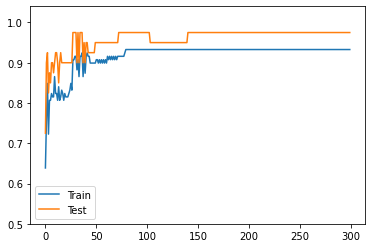

In [85]:
plt.plot(train_score, label = "Train")
plt.plot(test_score, label = "Test")
plt.ylim(0.5, 1.04)
plt.legend()
plt.show()